In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
cmap = plt.get_cmap('tab10')
from glob import glob

/var/folders/1r/_dnhk2ss6m3fr8s3lgl4kcmw0000gn/T/ipykernel_57133/2065010553.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


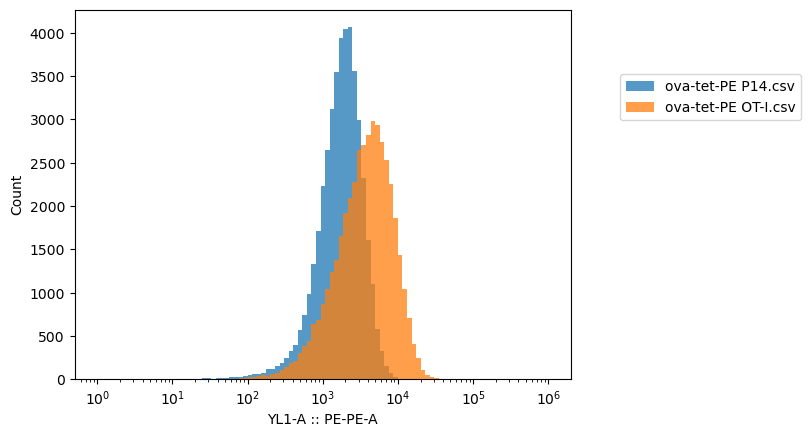

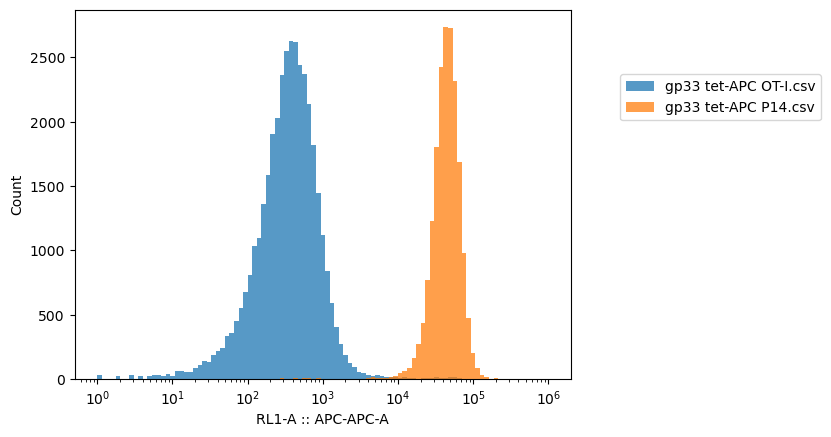

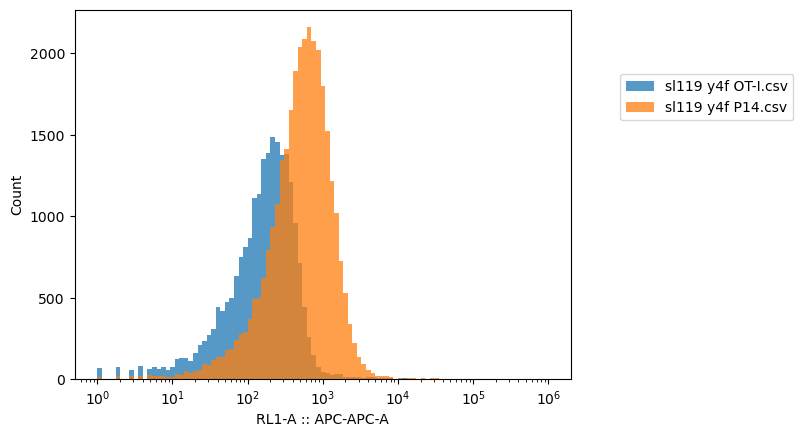

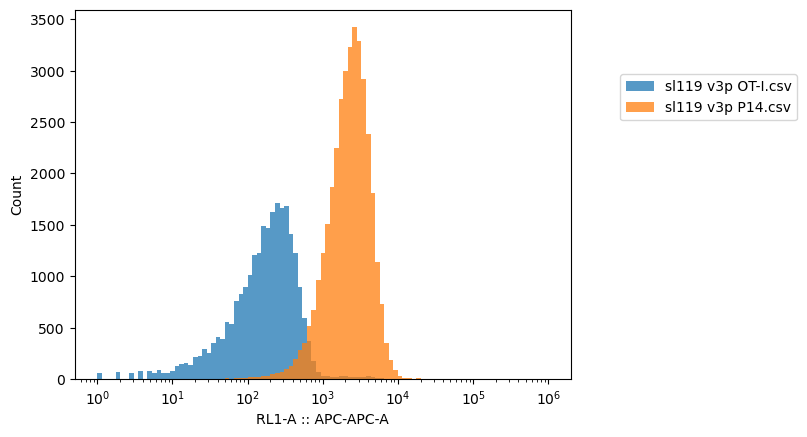

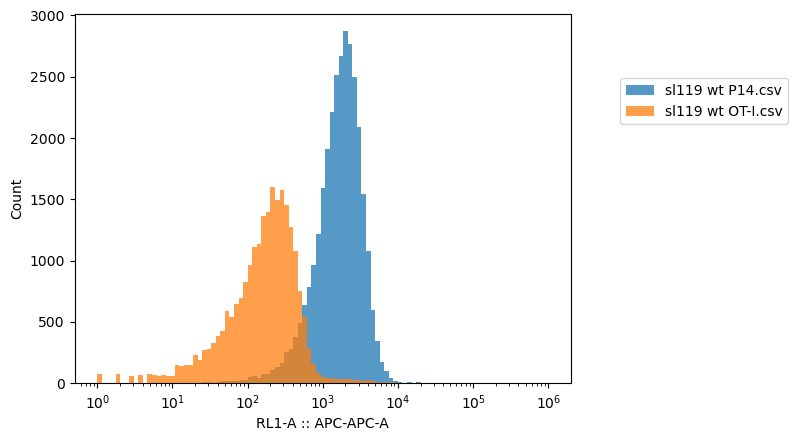

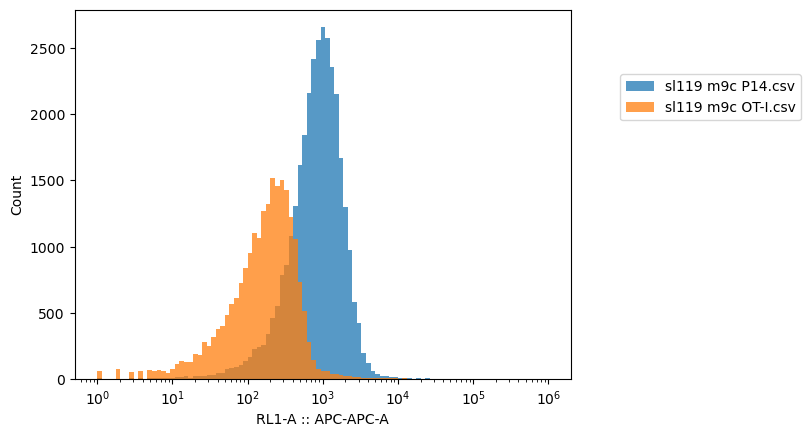

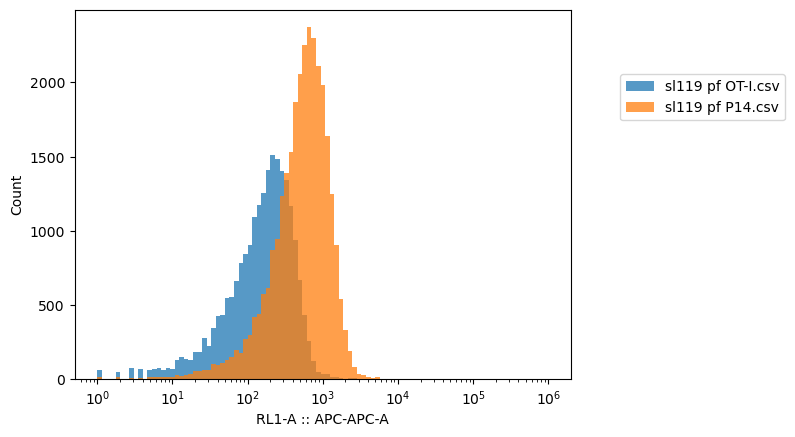

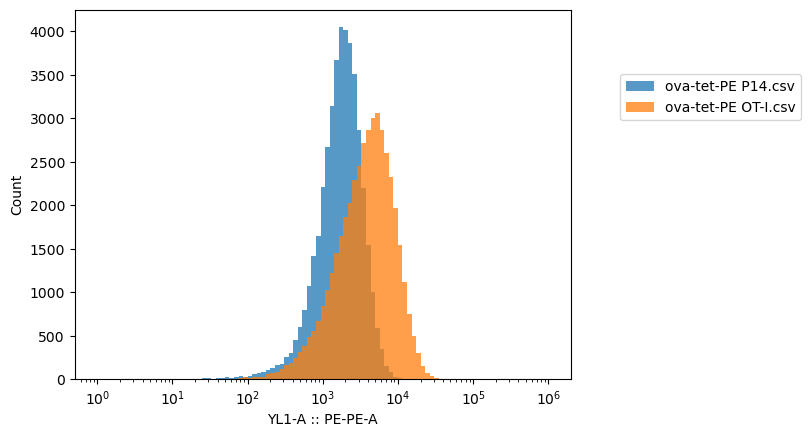

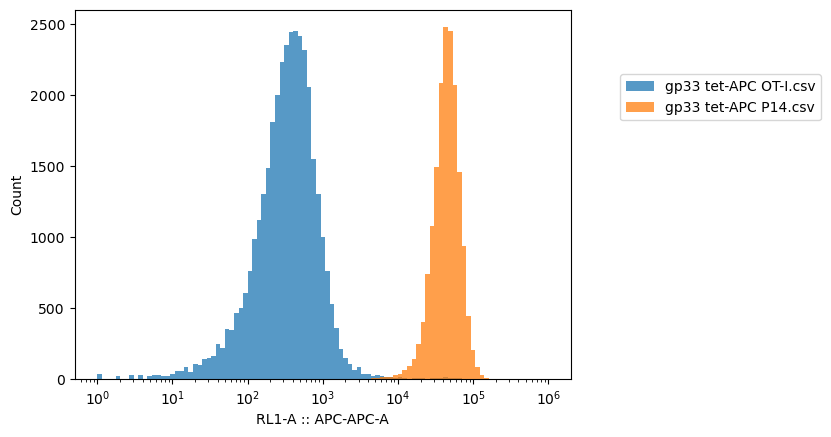

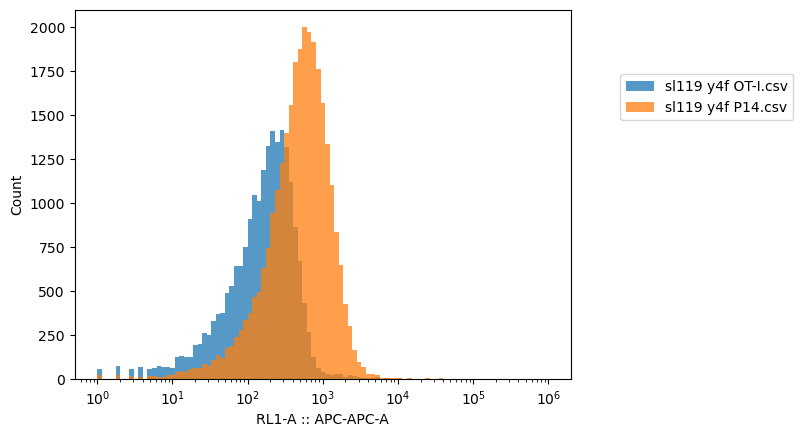

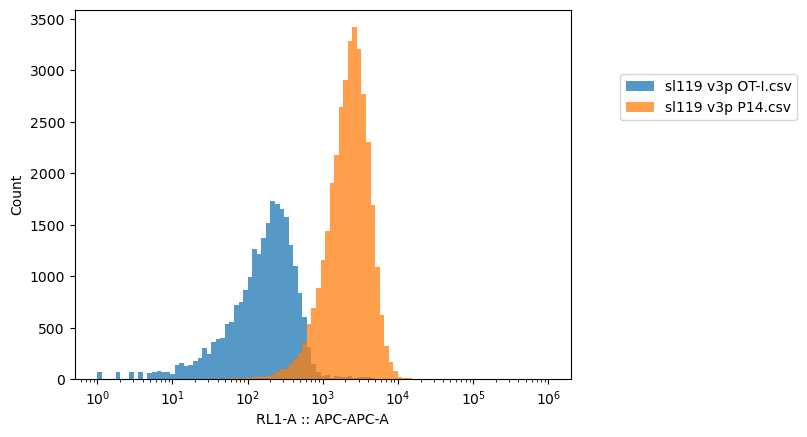

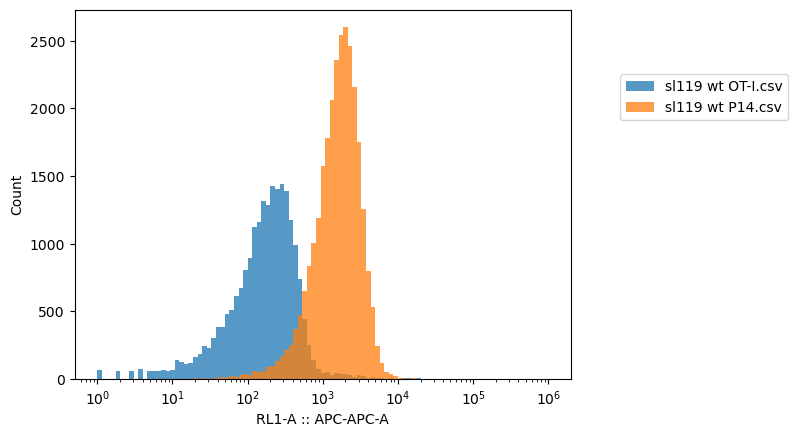

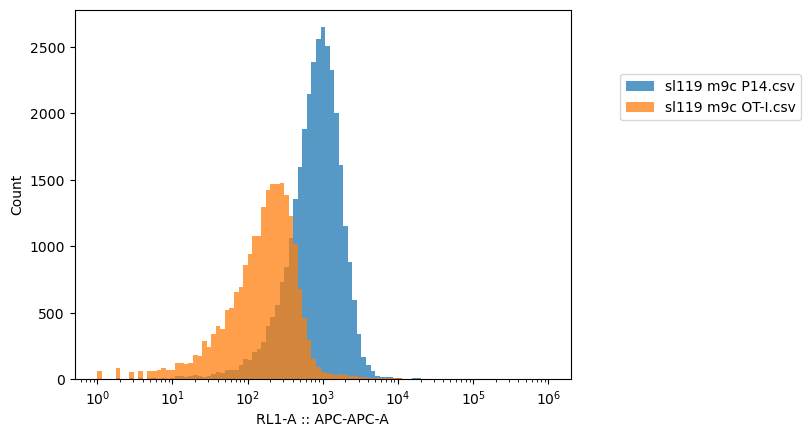

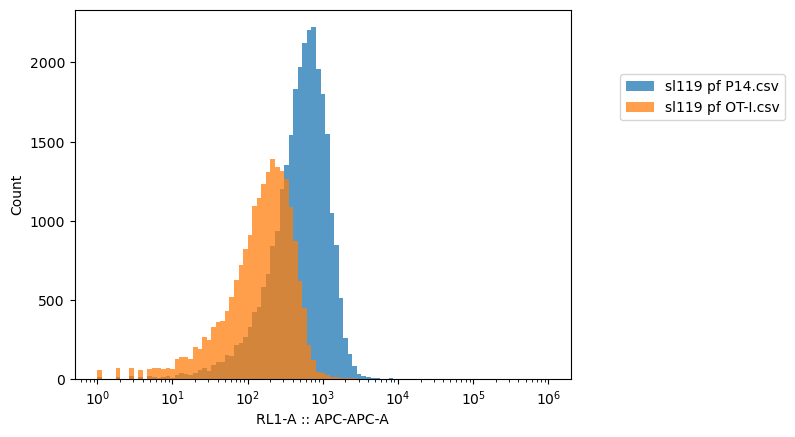

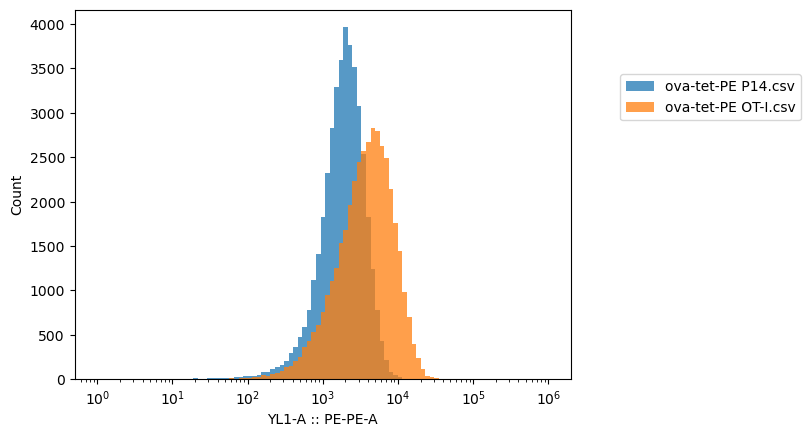

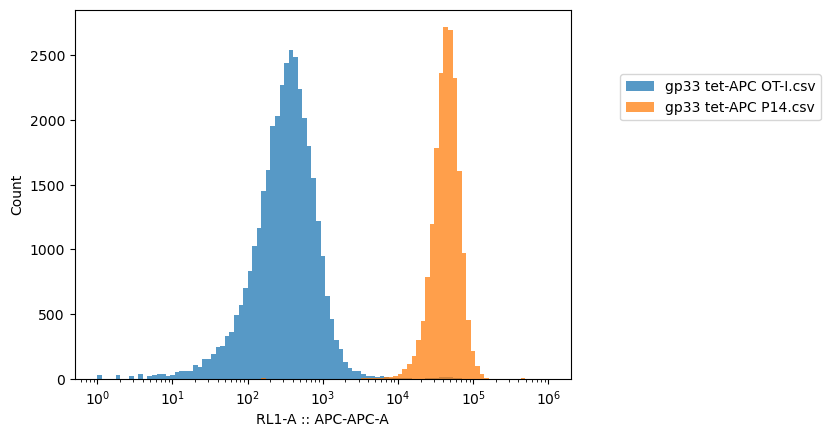

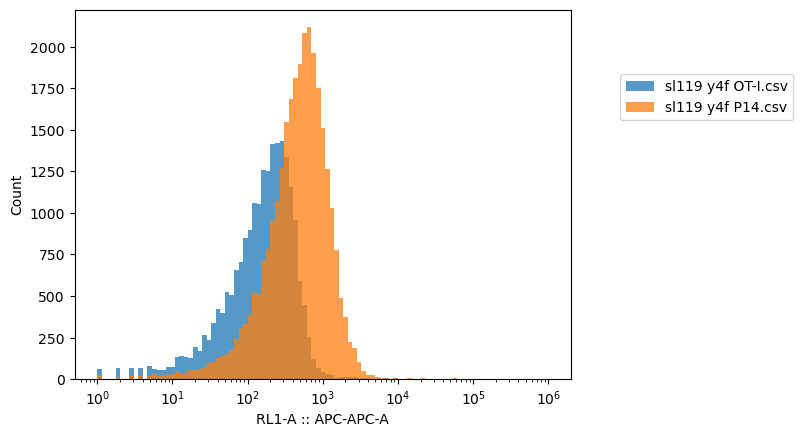

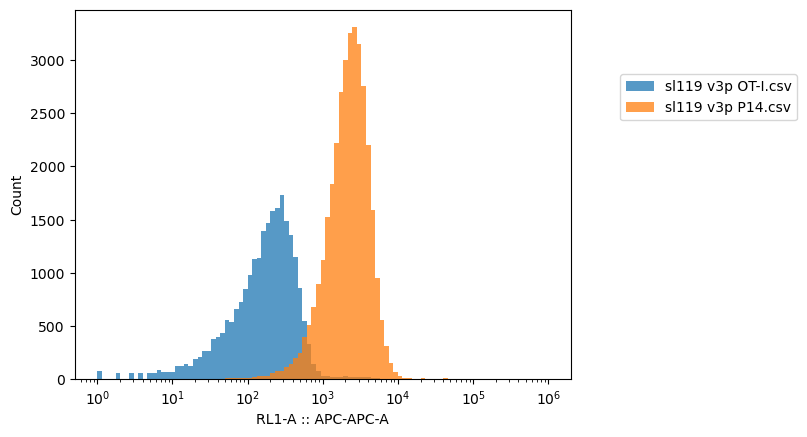

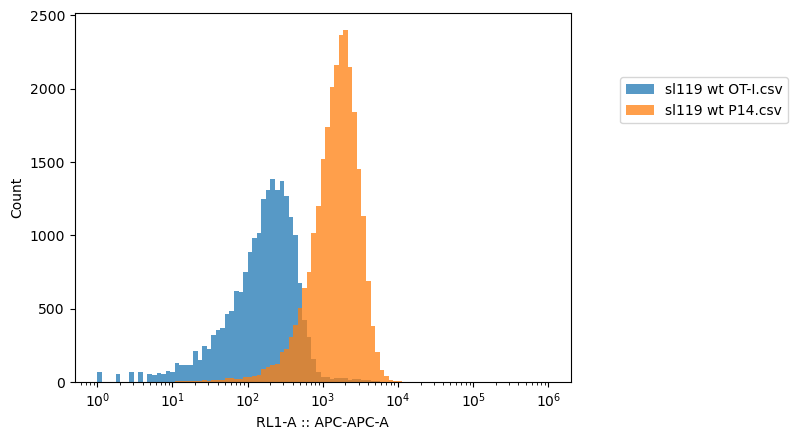

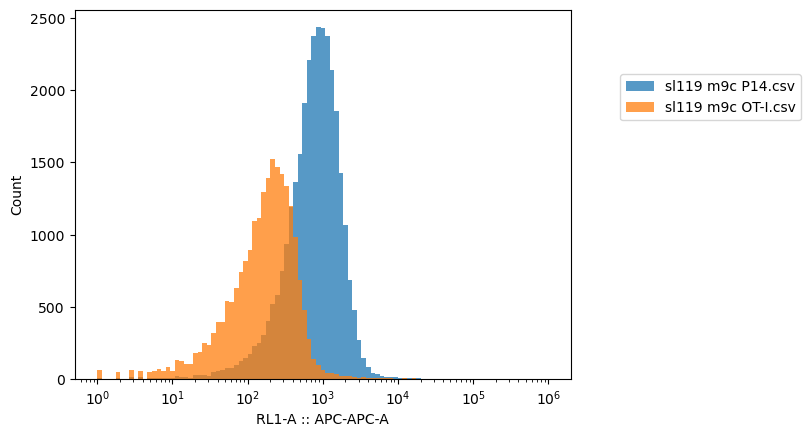

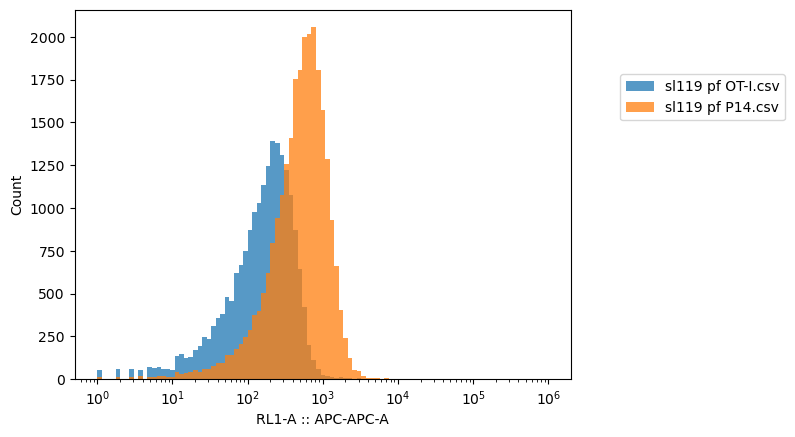

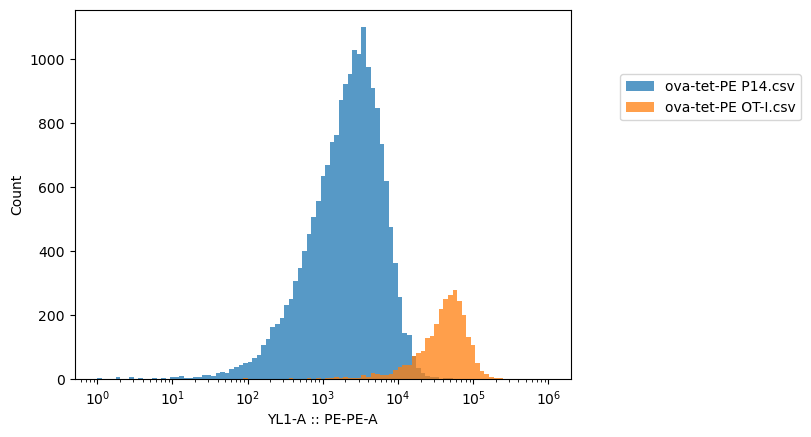

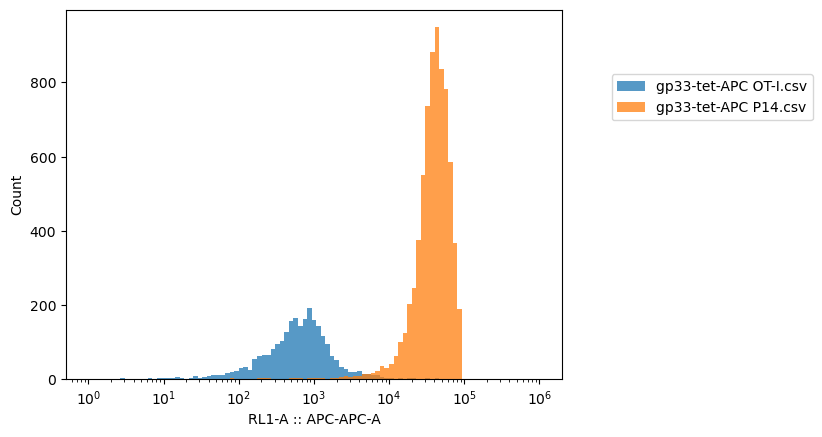

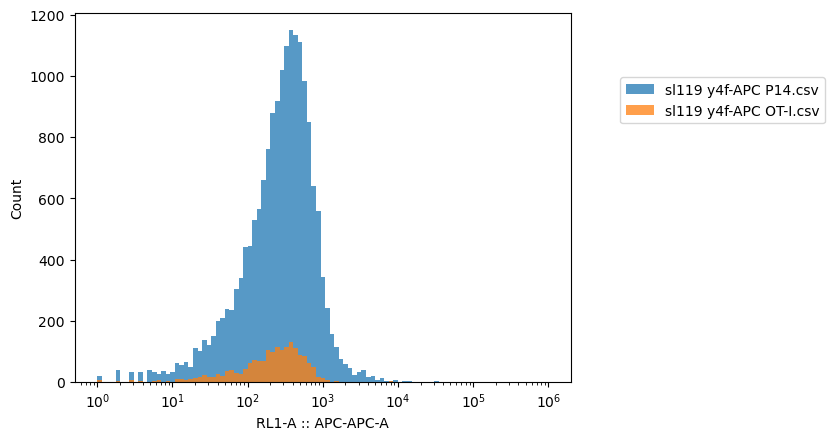

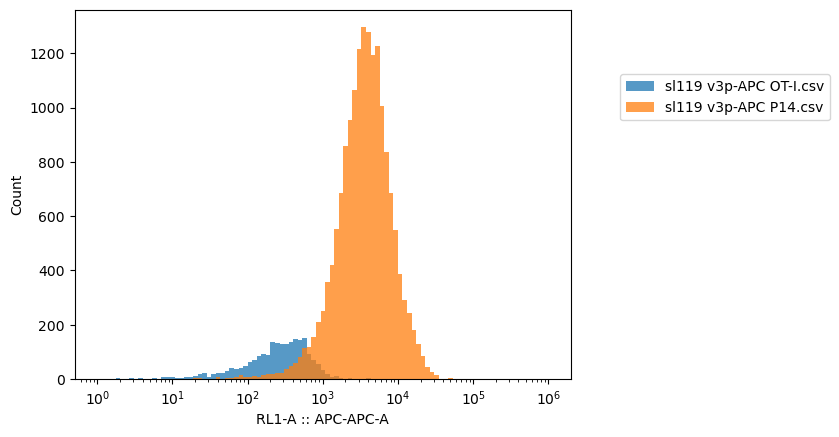

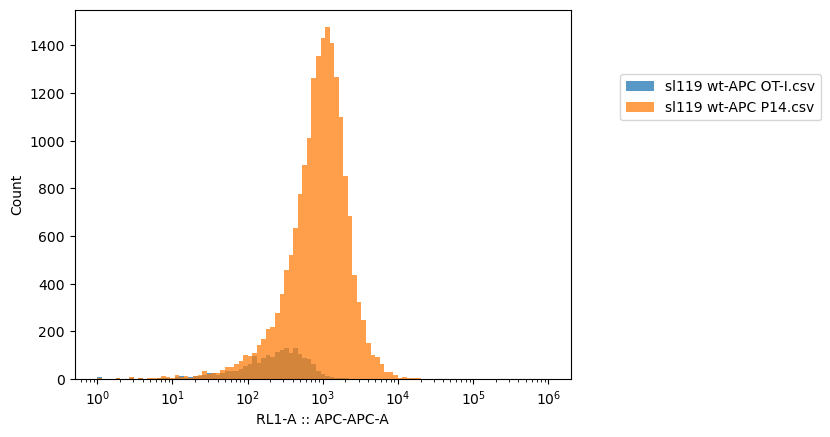

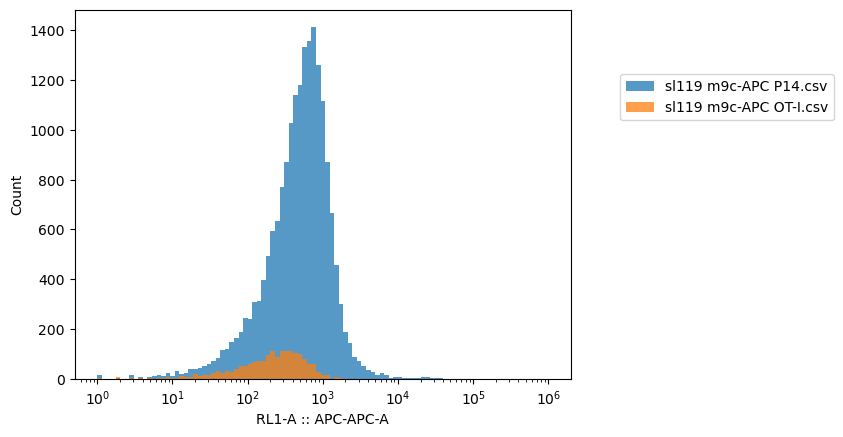

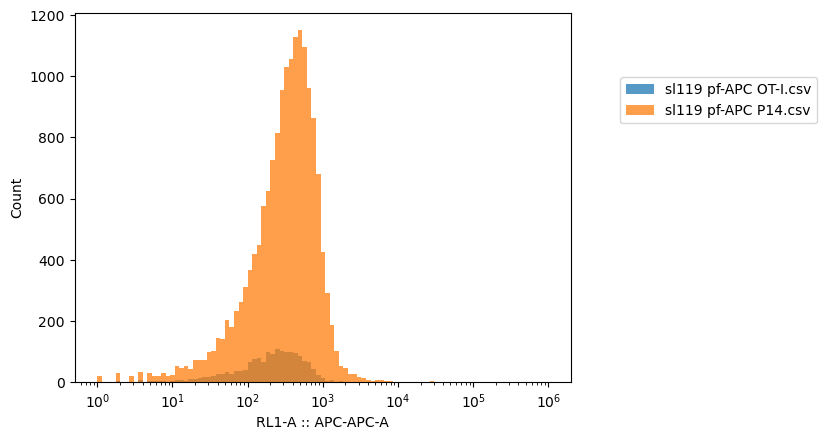

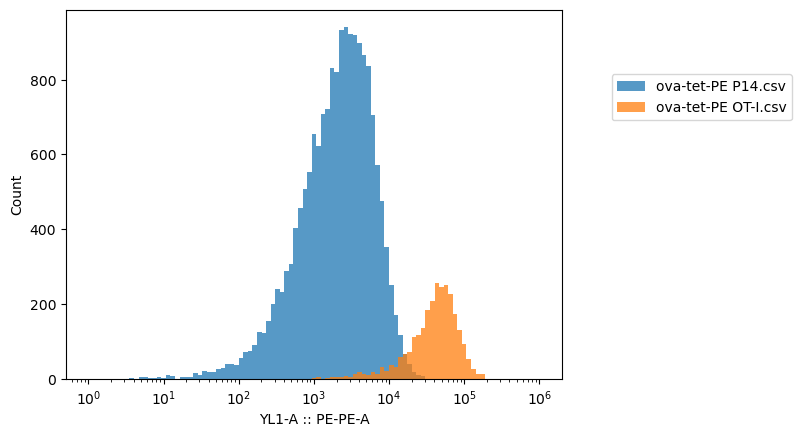

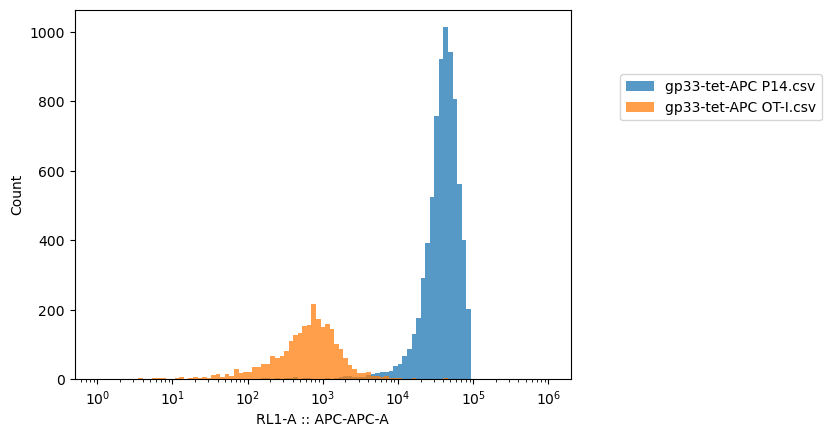

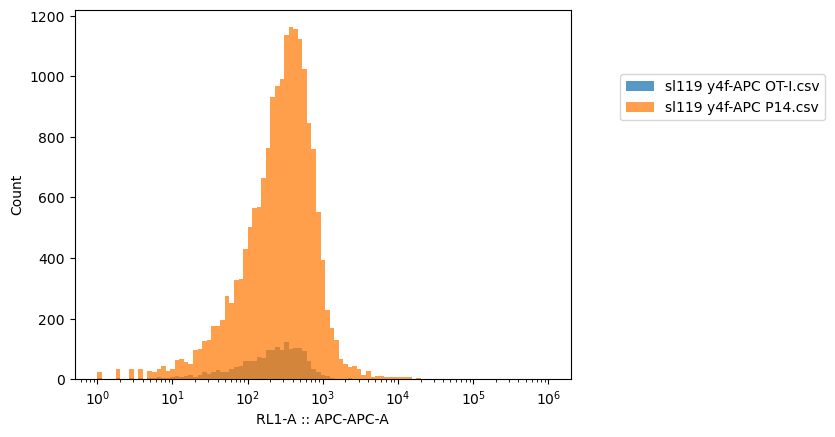

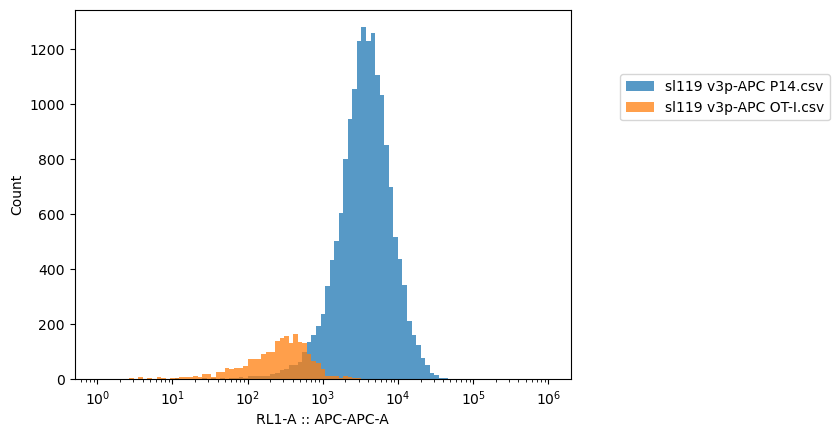

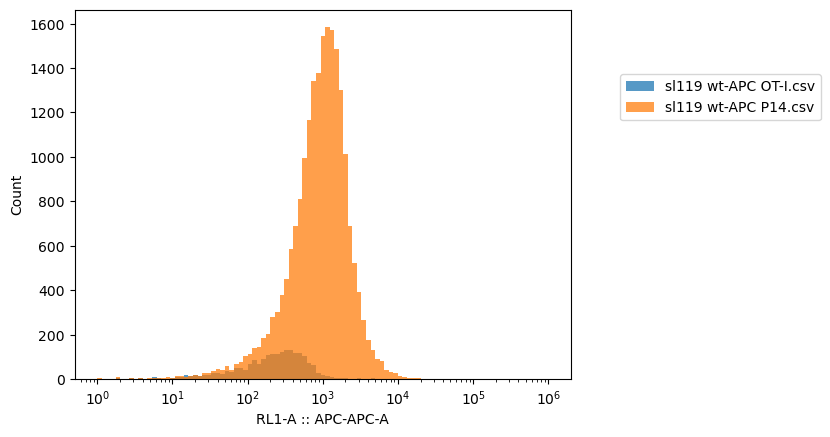

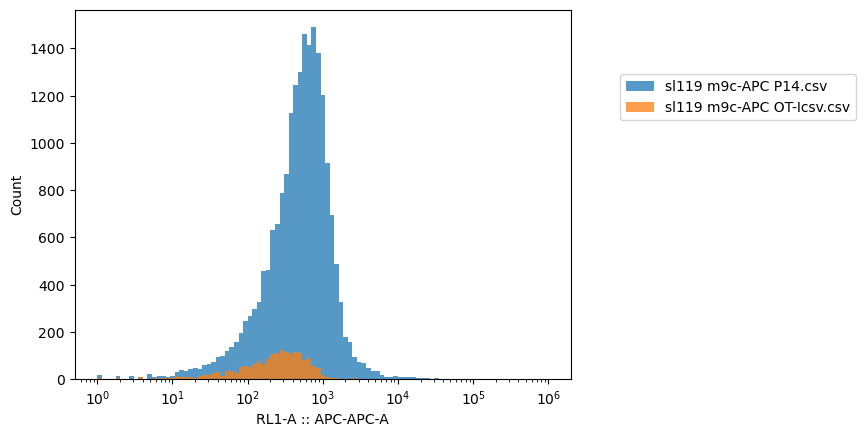

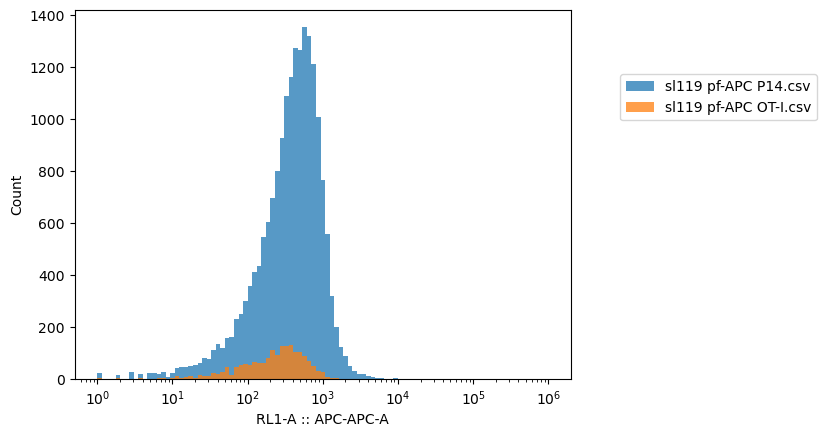

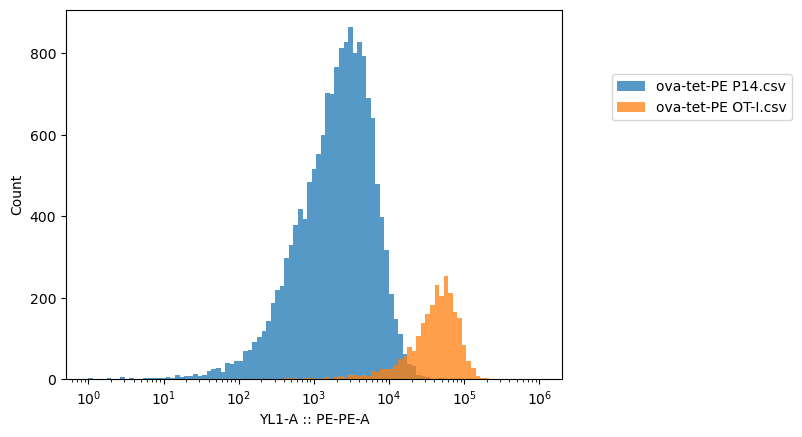

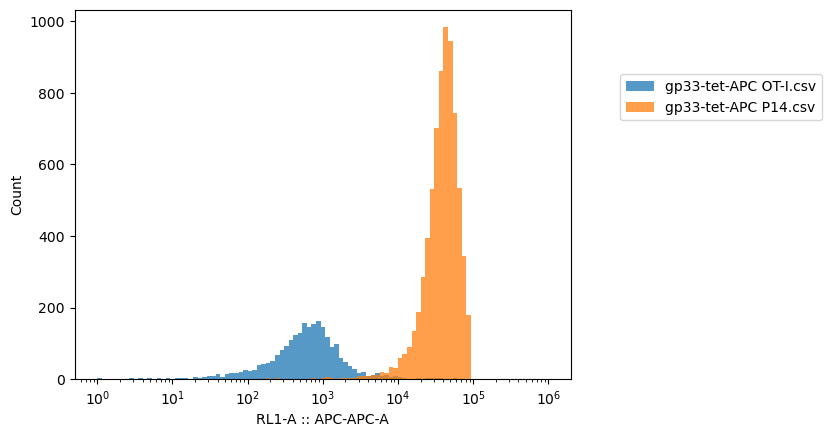

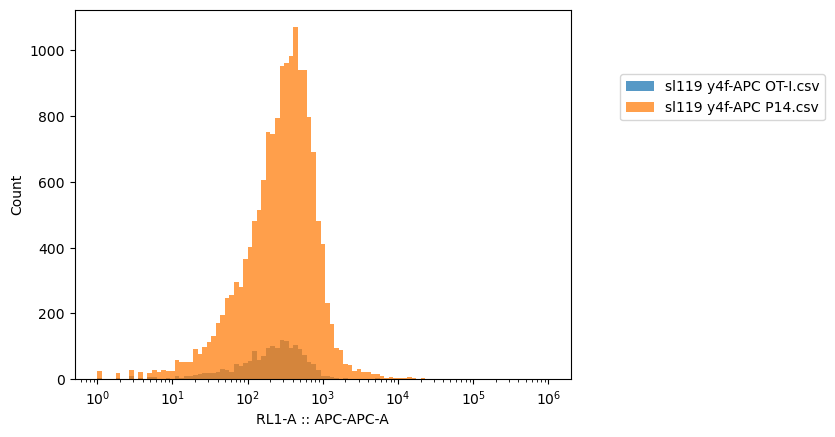

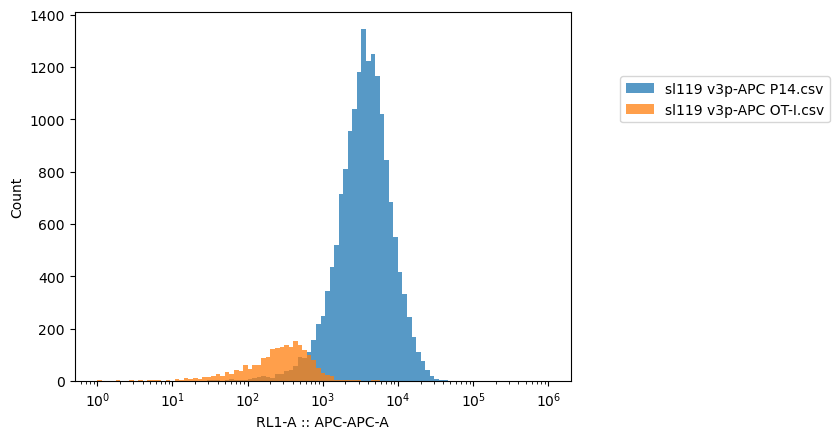

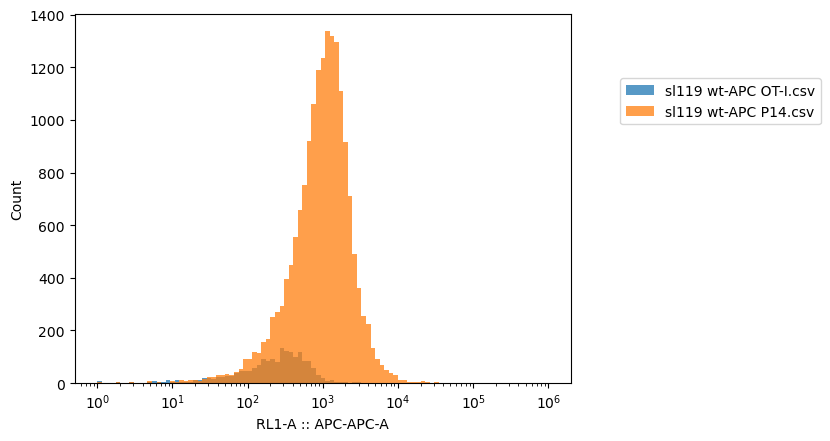

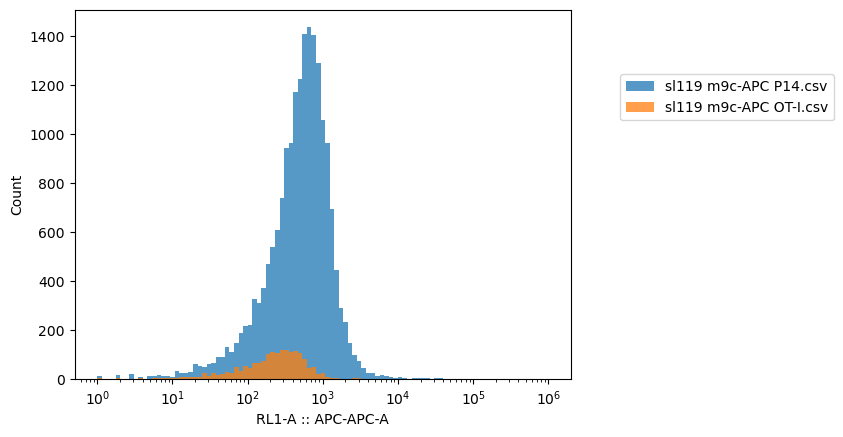

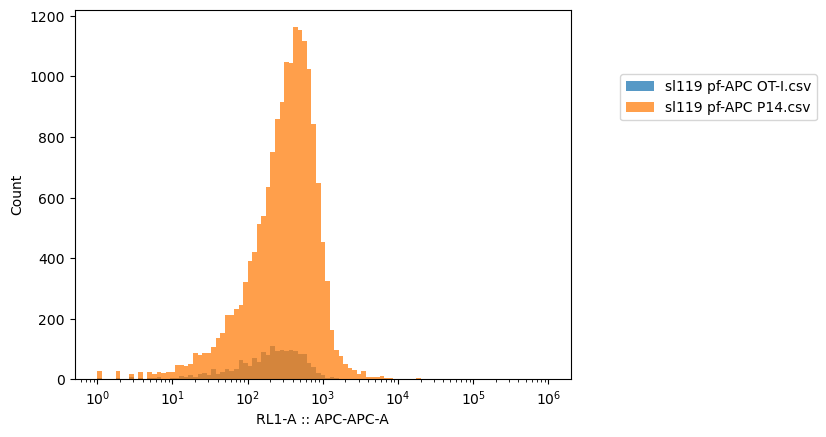

In [2]:
for row in 'ABCFGH':
    for col in range(1,8):
        files = glob(f'250903_sl119_jurkat_ot1_p14/export_{row}{col}_*.csv')

        plt.figure()
        for file in files:
            data = pd.read_csv(file)
            if 'PE' in file:
                sns.histplot(data['YL1-A :: PE-PE-A'],bins=np.logspace(0,6,100),label=' '.join(file.split('_')[6:]))
            else:
                sns.histplot(data['RL1-A :: APC-APC-A'],bins=np.logspace(0,6,100),label=' '.join(file.split('_')[6:]))
        plt.semilogx()
        plt.legend(loc=[1.1,0.7])

In [3]:
colors = {
    'P14':'#48327F',
    'OT-I':'gray'
}

names = {
    'ova-tet-PE':'OVA (tet)',
    'gp33_tet-APC':'gp33 (tet)',
    'sl119_y4f': 'Y4F (olig)',
    'sl119_v3p': 'V3P (olig)',
    'sl119_wt': 'gp33 (olig)',
    'sl119_m9c': 'M9C (olig)',
    'sl119_pf': 'PF (olig)',
}

rows = {
    'ova-tet-PE':'FGH',
    'gp33_tet-APC':'ABC',
    'sl119_y4f': 'ABC',
    'sl119_v3p': 'ABC',
    'sl119_wt': 'ABC',
    'sl119_m9c': 'ABC',
    'sl119_pf': 'ABC',
}

col_order = [
    'ova-tet-PE',
    'gp33_tet-APC',
    'sl119_y4f',
    'sl119_v3p',
    'sl119_wt',
    'sl119_m9c',
    'sl119_pf',
]

summary = []
for s,stain in enumerate(col_order):
    for r,row in enumerate(rows[stain]):
        for tcr in ['P14','OT-I']:
            data = pd.read_csv(f'250903_sl119_jurkat_ot1_p14/export_{row}{s+1}_{stain}_{tcr}.csv')

            if 'PE' in stain:
                channel = 'YL1-A :: PE-PE-A'
            else:
                channel = 'RL1-A :: APC-APC-A'
            med = data[channel].median()

            summary.append([names[stain],tcr,r,med])
summary = pd.DataFrame(summary,columns=['peptide','TCR','rep','MFI'])
summary

,peptide,TCR,rep,MFI
0,OVA (tet),P14,0,2227.0
1,OVA (tet),OT-I,0,44738.0
2,OVA (tet),P14,1,2185.0
3,OVA (tet),OT-I,1,43571.0
4,OVA (tet),P14,2,2169.0
5,OVA (tet),OT-I,2,44408.5
6,gp33 (tet),P14,0,44586.0
7,gp33 (tet),OT-I,0,336.0
8,gp33 (tet),P14,1,44763.0
9,gp33 (tet),OT-I,1,330.0


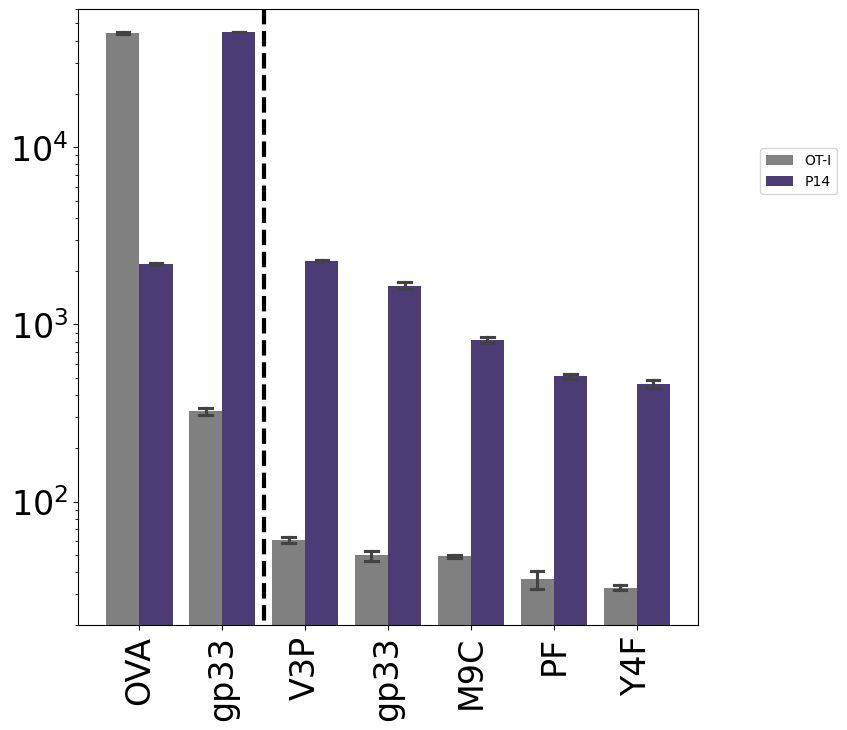

In [34]:
plt.figure(figsize=[8,8])
order = ['OVA (tet)','gp33 (tet)','V3P (olig)','gp33 (olig)','M9C (olig)','PF (olig)','Y4F (olig)']
sns.barplot(data=summary,x='peptide',y='MFI',hue='TCR',errorbar=('sd',1),capsize=0.3,palette=colors,hue_order=['OT-I','P14'],order=order)
plt.plot([1.5,1.5],[1,1e5],'k--',linewidth=3)
plt.ylim([20,6e4])
plt.semilogy()
plt.xticks(range(len(order)),[x.split()[0] for x in order],fontsize=24,rotation=90)
plt.yticks(fontsize=24)
plt.xlabel('')
plt.ylabel('')
plt.legend(loc=[1.1,0.7])
plt.savefig('TCR_staining_bar_chart.png',dpi=300,bbox_inches='tight')

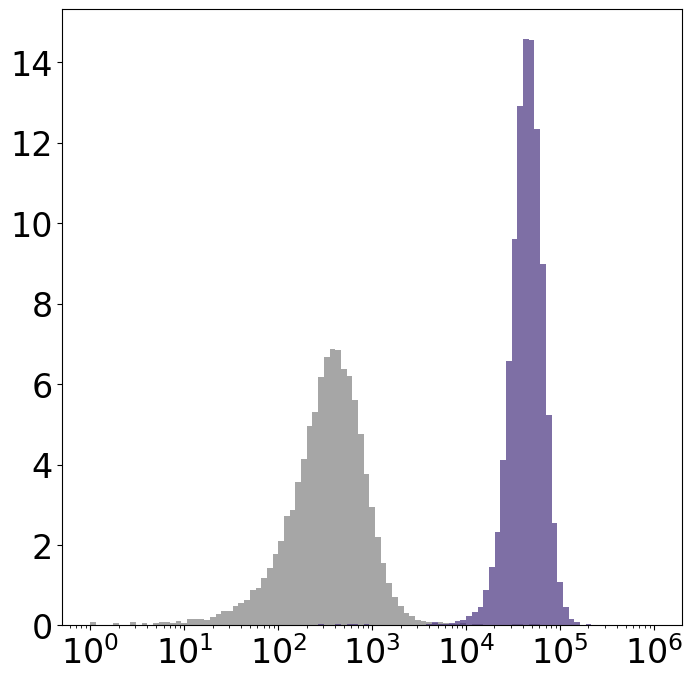

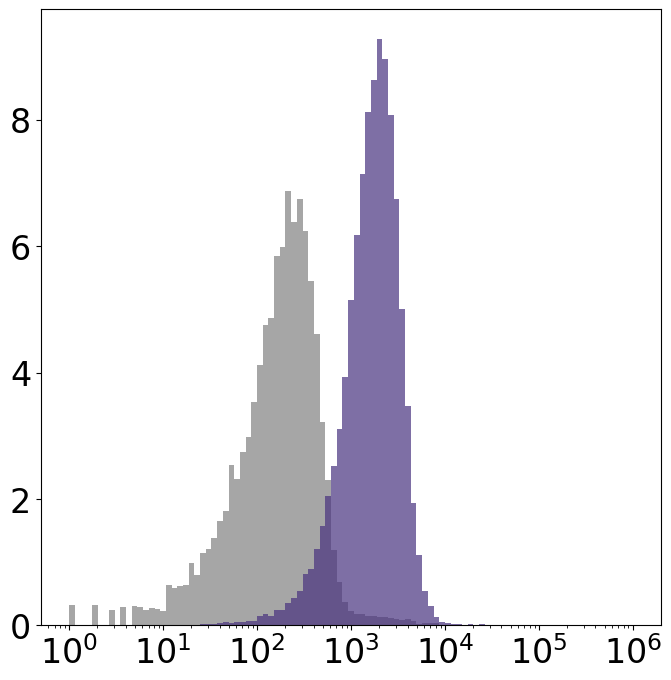

In [36]:
for s in [1,4]:
    stain = col_order[s]
    plt.figure(figsize=[8,8])
    for tcr in ['OT-I','P14']:
        data = pd.read_csv(f'250903_sl119_jurkat_ot1_p14/export_{rows[stain][0]}{s+1}_{stain}_{tcr}.csv')
        sns.histplot(data['RL1-A :: APC-APC-A'],bins=np.logspace(0,6,100),color=colors[tcr],alpha=0.7,stat='percent')
    plt.semilogx()
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.xlabel('')
    plt.ylabel('')
    plt.savefig(f'{names[stain]}_histogram.png',dpi=300,bbox_inches='tight')